In [33]:
%pip install fastbook

In [34]:
from fastcore.all import *
from fastbook import *

In [35]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('C:/Users/ratti/.fastai/data/camvid_tiny/codes.txt'),Path('C:/Users/ratti/.fastai/data/camvid_tiny/images'),Path('C:/Users/ratti/.fastai/data/camvid_tiny/labels')]

In [36]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter',
       'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [37]:
fnames = get_image_files(path/"images")
fnames[0]

Path('C:/Users/ratti/.fastai/data/camvid_tiny/images/0001TP_006750.png')

In [38]:
(path/"labels").ls()[0]

Path('C:/Users/ratti/.fastai/data/camvid_tiny/labels/0001TP_006750_P.png')

In [41]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [42]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

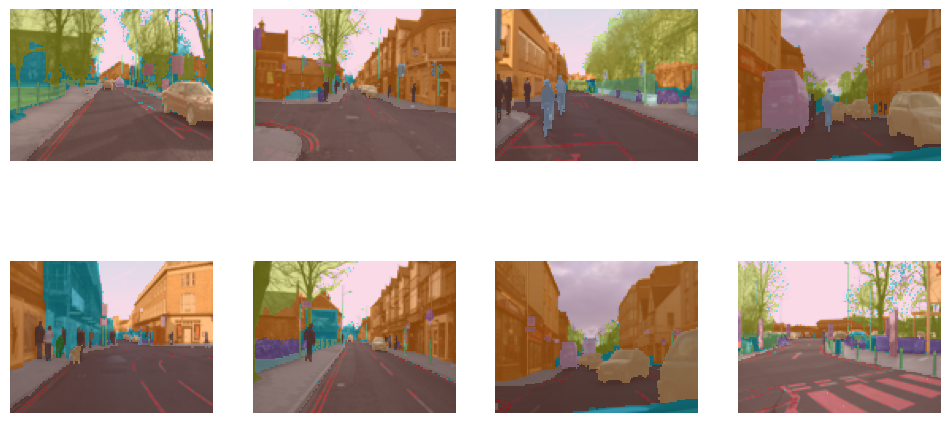

In [43]:
dls.show_batch()

In [55]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

epoch,train_loss,valid_loss,time
0,3.094566,3.701073,00:20


epoch,train_loss,valid_loss,time
0,2.184106,2.084216,00:28
1,1.886824,1.383157,00:29
2,1.643811,1.242906,00:29
3,1.466398,1.384265,00:29
4,1.325095,1.004058,00:29
5,1.196827,0.849960,00:29
6,1.077041,0.801932,00:29
7,0.974439,0.747366,00:29
8,0.888188,0.740931,00:29
9,0.816157,0.717011,00:29


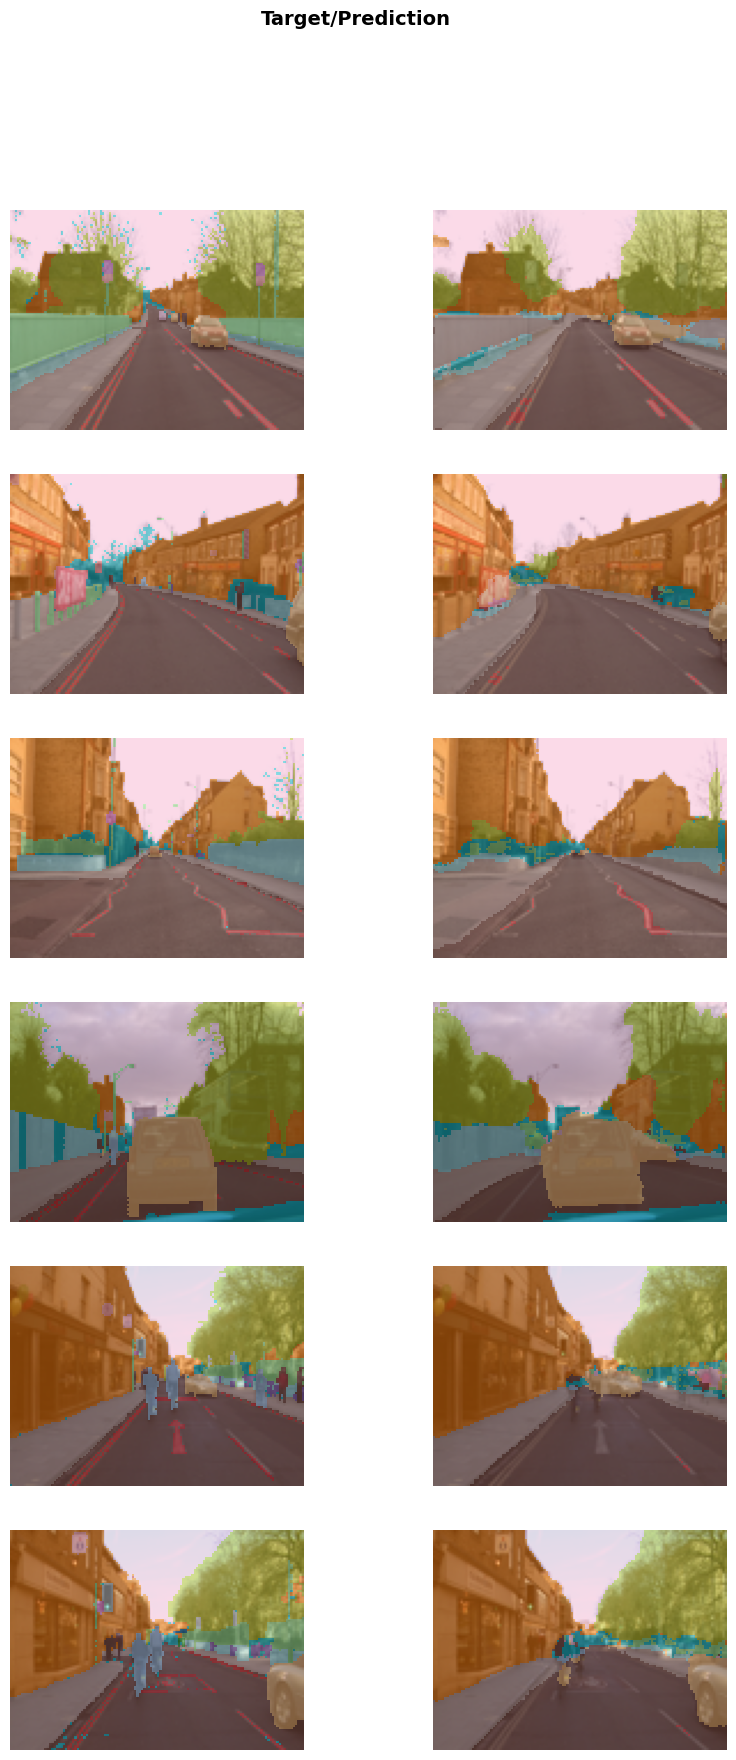

In [56]:
learn.show_results(max_n=6, figsize=(10,20))